In [1]:
!pip install pandas matplotlib seaborn nltk wordcloud gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [4]:
!pip install --upgrade numpy

In [7]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 95.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [10]:
!pip install --upgrade numpy
!pip install --upgrade pandas

In [12]:

!pip install --upgrade numpy pandas


In [2]:
!pip install --upgrade numpy
!pip install --upgrade gensim
# Reinstalling gensim after upgrading numpy ensures compatibility
# between the two libraries.

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import corpora
from gensim.models import LdaModel
import re
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
# Load dataset
df = pd.read_csv('sentimentdataset.csv')


In [6]:
# Display first 5 rows
print(df.head(5))

  ID Unnamed: 0                                               Text  \
0  0          0   Enjoying a beautiful day at the park!        ...   
1  1          1   Traffic was terrible this morning.           ...   
2  2          2   Just finished an amazing workout! 💪          ...   
3  3          3   Excited about the upcoming weekend getaway!  ...   
4  4          4   Trying out a new recipe for dinner tonight.  ...   

     Sentiment        Timestamp            User     Platform  \
0   Positive    1/15/2023 12:30   User123          Twitter     
1   Negative     1/15/2023 8:45   CommuterX        Twitter     
2   Positive    1/15/2023 15:45   FitnessFan      Instagram    
3   Positive    1/15/2023 18:20   AdventureX       Facebook    
4   Neutral     1/15/2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning             

In [7]:
# Data Cleaning
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'ID'], inplace=True)


In [8]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [9]:
# Fill missing values (if any)
df['Likes'].fillna(0, inplace=True)
df['Retweets'].fillna(0, inplace=True)
df.dropna(subset=['Text', 'Sentiment', 'Platform'], inplace=True)


In [10]:
# Text Preprocessing
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)


In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

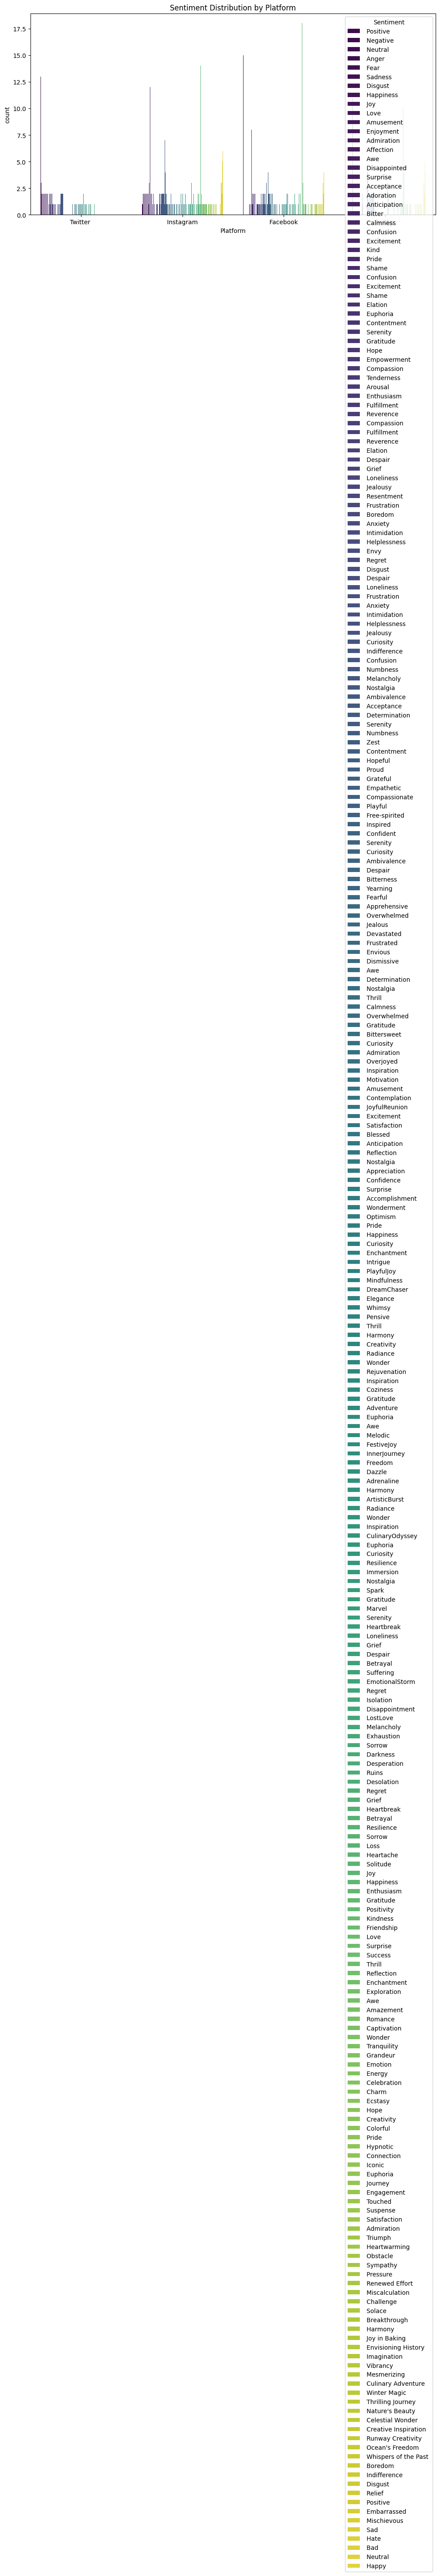

In [13]:
# Sentiment Analysis by Platform
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Platform', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution by Platform')
plt.show()

In [14]:
# Hashtag Analysis
def extract_hashtags(text):
    return [tag.strip("#") for tag in text.split() if tag.startswith("#")]

df['Hashtags'] = df['Hashtags'].apply(lambda x: extract_hashtags(x) if isinstance(x, str) else [])


In [15]:
# Flatten hashtags list
all_hashtags = [hashtag for sublist in df['Hashtags'] for hashtag in sublist]


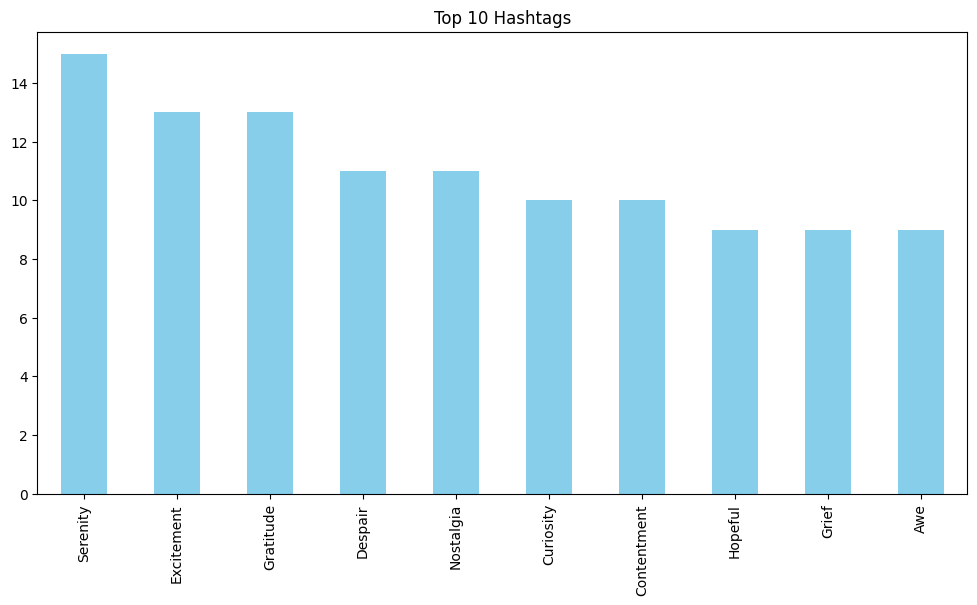

In [16]:
# Top 10 Hashtags
plt.figure(figsize=(12, 6))
pd.Series(all_hashtags).value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Hashtags')
plt.show()


In [18]:
# Topic Modeling (LDA)
# Prepare corpus
# Apply preprocess_text to the 'Text' column and create 'Clean_Text' column
df['Clean_Text'] = df['Text'].apply(preprocess_text)
texts = [text.split() for text in df['Clean_Text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [19]:
# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)


In [20]:
# Print topics
print("Top Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Top Topics:
Topic 0: 0.010*"new" + 0.010*"art" + 0.007*"emotion" + 0.006*"life" + 0.005*"garden" + 0.005*"heart" + 0.005*"grief" + 0.004*"tear" + 0.004*"sunset" + 0.003*"like"
Topic 1: 0.013*"moment" + 0.009*"nature" + 0.008*"life" + 0.006*"serenity" + 0.006*"beauty" + 0.006*"quiet" + 0.006*"world" + 0.006*"exploring" + 0.005*"joy" + 0.005*"concert"
Topic 2: 0.008*"night" + 0.006*"air" + 0.006*"solitude" + 0.006*"echo" + 0.005*"shield" + 0.005*"personal" + 0.005*"loneliness" + 0.005*"journey" + 0.005*"hopeful" + 0.005*"like"
Topic 3: 0.011*"new" + 0.009*"dream" + 0.009*"laughter" + 0.008*"friend" + 0.007*"family" + 0.006*"feeling" + 0.006*"day" + 0.005*"excitement" + 0.005*"heart" + 0.005*"project"
Topic 4: 0.007*"day" + 0.006*"feeling" + 0.006*"acceptance" + 0.005*"challenge" + 0.005*"dance" + 0.004*"journey" + 0.004*"dream" + 0.004*"winter" + 0.004*"savoring" + 0.004*"like"


In [21]:
# Time-Based Analysis
df.set_index('Timestamp', inplace=True)


In [22]:
# Resample data by month
monthly_posts = df.resample('M').size()


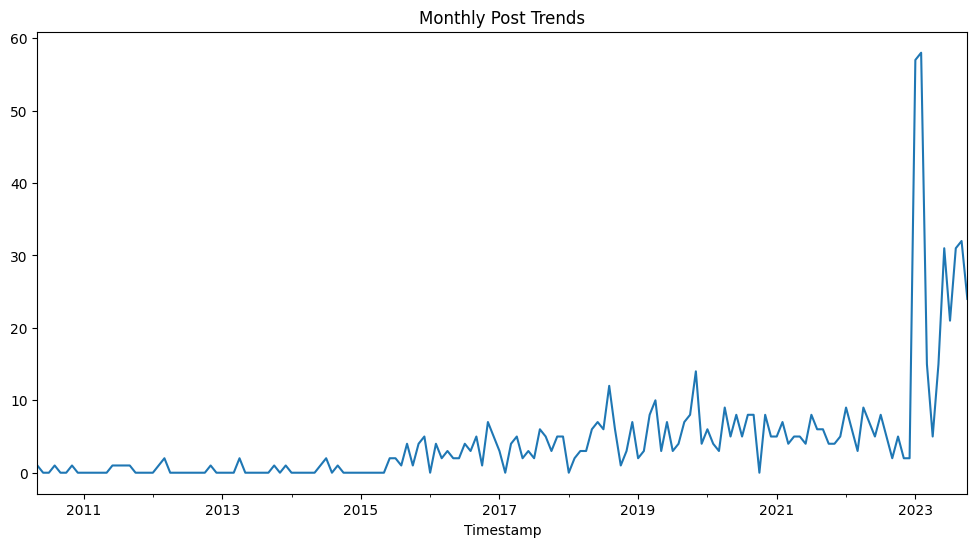

In [23]:
plt.figure(figsize=(12, 6))
monthly_posts.plot(title='Monthly Post Trends')
plt.show()


In [24]:
# Platform-Specific Insights
platform_analysis = df.groupby('Platform').agg({
    'Likes': 'mean',
    'Retweets': 'mean',
    'Sentiment': lambda x: (x == 'Positive').mean()
}).reset_index()

print("Platform Performance:")
print(platform_analysis)


Platform Performance:
      Platform      Likes   Retweets  Sentiment
0    Facebook   41.870130  20.969697        0.0
1   Instagram   45.089147  22.600775        0.0
2     Twitter   45.382812  22.796875        0.0
3    Twitter    37.304348  18.704348        0.0


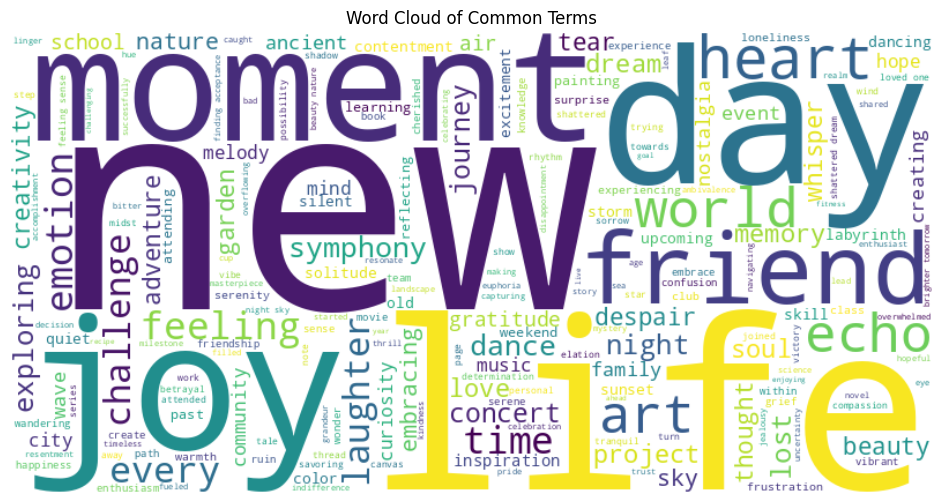

In [25]:
# Word Cloud for Text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Clean_Text']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Terms')
plt.show()